In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
# Use the correct key '.csv' to access the uploaded file
m = pd.read_csv(io.BytesIO(uploaded['animal.csv']), encoding='latin-1')

Saving animal.csv to animal.csv


In [3]:
m.head(5)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia


In [4]:
m.shape

(43778, 7)

In [5]:
df=m.copy()

In [6]:
df.columns

Index(['Animal', 'Age', 'Temperature', 'Symptom 1', 'Symptom 2', 'Symptom 3',
       'Disease'],
      dtype='object')

In [7]:
df.isnull().sum()

,0
Animal,0
Age,0
Temperature,0
Symptom 1,0
Symptom 2,0
Symptom 3,0
Disease,0


<Axes: >

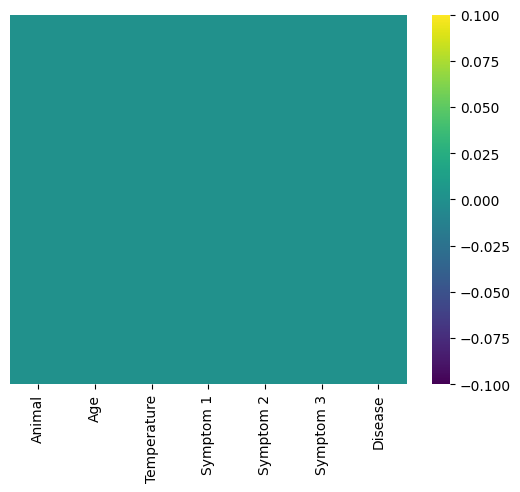

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43778 entries, 0 to 43777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Animal       43778 non-null  object 
 1   Age          43778 non-null  int64  
 2   Temperature  43778 non-null  float64
 3   Symptom 1    43778 non-null  object 
 4   Symptom 2    43778 non-null  object 
 5   Symptom 3    43778 non-null  object 
 6   Disease      43778 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


In [10]:
df['Symptom 1'].unique()

array(['depression', 'painless lumps', 'loss of appetite',
       'difficulty walking', 'lameness', 'chills', 'crackling sound',
       'sores on gums', 'fatigue', 'shortness of breath',
       'chest discomfort', 'swelling in limb', 'swelling in abdomen',
       'blisters on gums', 'swelling in extremities',
       'swelling in muscle', 'blisters on hooves', 'blisters on tongue',
       'sores on tongue', 'sweats', 'sores on hooves',
       'blisters on mouth', 'swelling in neck', 'sores on mouth'],
      dtype=object)

In [11]:
df['Animal'].unique()

array(['cow', 'buffalo', 'sheep', 'goat'], dtype=object)

In [12]:
df['Disease'].unique()

array(['pneumonia', 'lumpy virus', 'blackleg', 'foot and mouth',
       'anthrax'], dtype=object)

**Visualization**

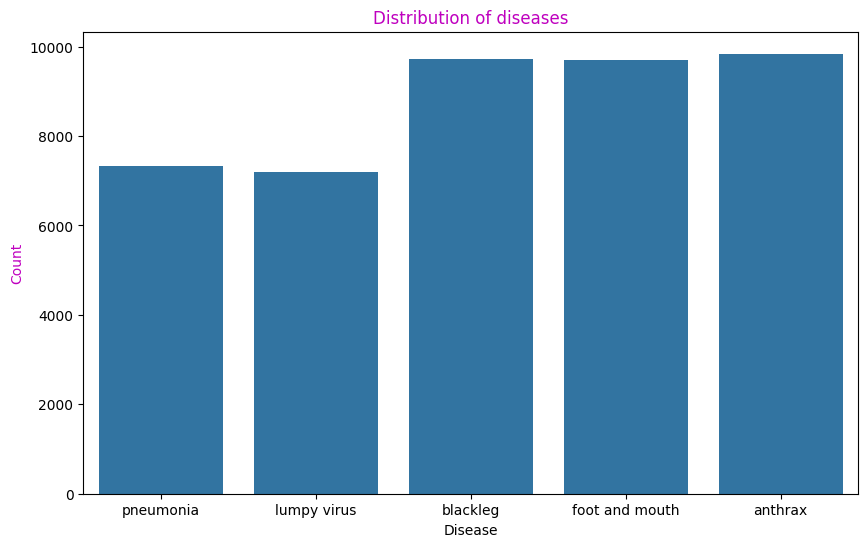

In [13]:
#Distribution of diseases
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Disease')
plt.title('Distribution of diseases',c='m')
plt.ylabel('Count',c='m')
plt.show()

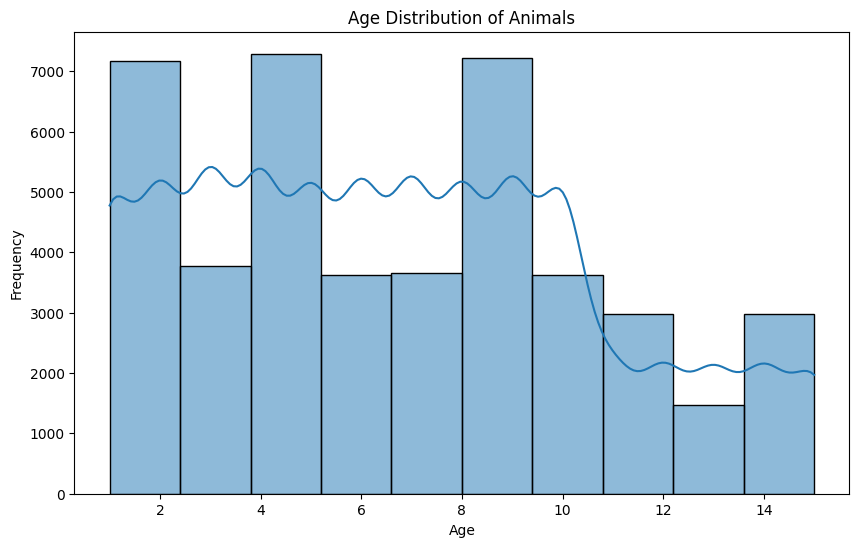

In [14]:
#Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title('Age Distribution of Animals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

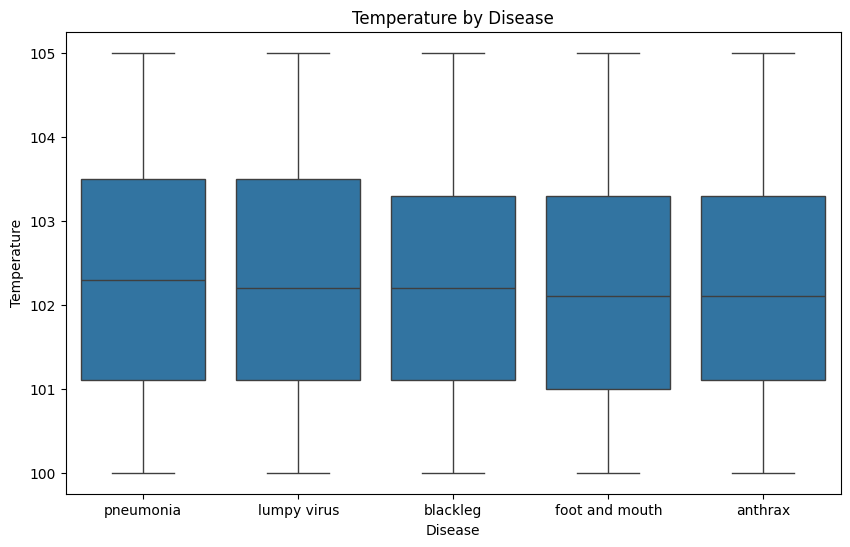

In [15]:
# Temperature by Disease
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Disease', y='Temperature')
plt.title('Temperature by Disease')
plt.show()

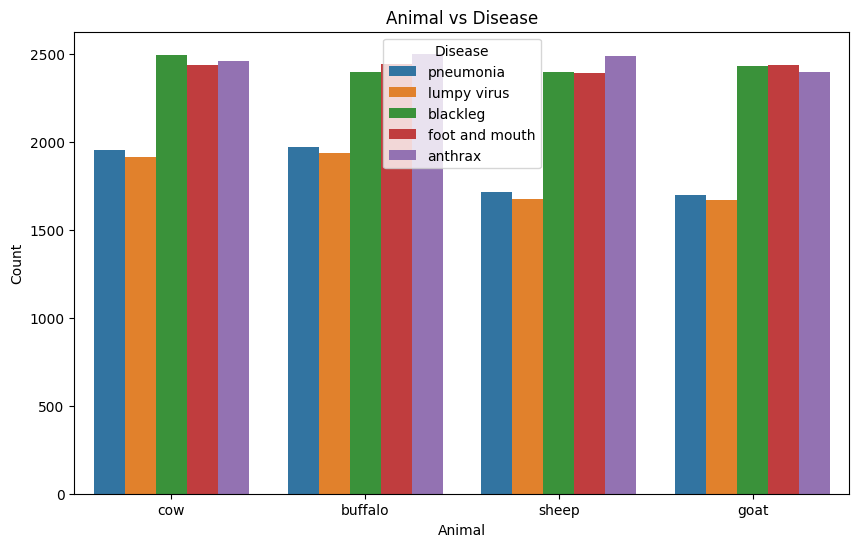

In [16]:
#Animal vs Disease
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Animal', hue='Disease')
plt.title('Animal vs Disease')
plt.xlabel('Animal')
plt.ylabel('Count')
plt.show()

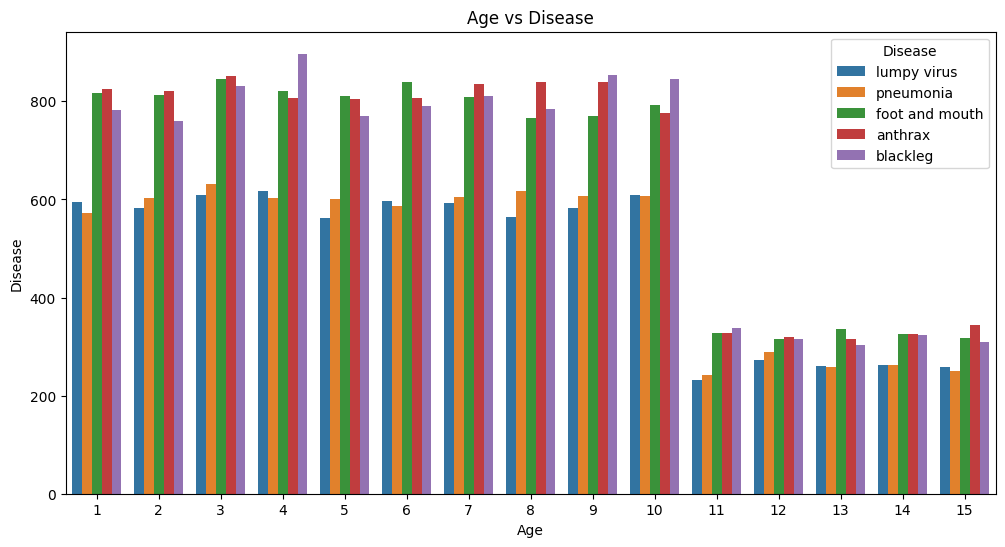

In [17]:
# Age vs Disease
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age', hue='Disease')
plt.title('Age vs Disease')
plt.xlabel('Age')
plt.ylabel('Disease')
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43778 entries, 0 to 43777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Animal       43778 non-null  object 
 1   Age          43778 non-null  int64  
 2   Temperature  43778 non-null  float64
 3   Symptom 1    43778 non-null  object 
 4   Symptom 2    43778 non-null  object 
 5   Symptom 3    43778 non-null  object 
 6   Disease      43778 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


Converting object dtype into int

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
df['Animal']=le.fit_transform(df['Animal'])
df['Symptom 1']=le.fit_transform(df['Symptom 1'])
df['Symptom 2']=le.fit_transform(df['Symptom 2'])
df['Symptom 3']=le.fit_transform(df['Symptom 3'])
df['Disease']=le.fit_transform(df['Disease'])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
x=df.drop(['Disease'],axis=1)
y=df['Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
lo=LogisticRegression()
lo.fit(x_train,y_train)

LogisticRegression()

In [24]:
lo.score(x_train,y_train)

0.23576608988635714

In [25]:
y_pred=lo.predict(x_test)

In [26]:
y_pred

array([2, 0, 2, ..., 0, 2, 2])

In [27]:
accuracy_score(y_test,y_pred)

0.23835084513476473

we are using grid search tuning method for boosting the machine learning model.

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


In [29]:
model = RandomForestClassifier()


In [30]:
# Define the hyperparameter grid/distribution
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

In [31]:
 #Instantiate GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [32]:
# Use the best model for predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

In [33]:
accuracy_score(y_test,predictions)

0.8044769301050708

In [36]:
c=classification_report(y_test,predictions)
print('classification report\n:',c)

classification report
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1972
           1       1.00      0.90      0.95      1963
           2       1.00      1.00      1.00      1963
           3       0.42      0.15      0.22      1443
           4       0.44      0.79      0.57      1415

    accuracy                           0.80      8756
   macro avg       0.77      0.77      0.75      8756
weighted avg       0.81      0.80      0.79      8756



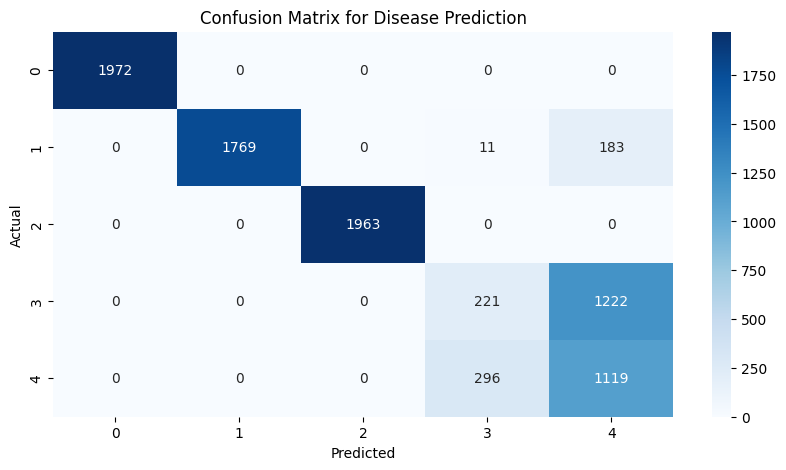

In [38]:

plt.figure(figsize=(10, 5))
cm_disease = confusion_matrix(y_test, predictions)
sns.heatmap(cm_disease, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Disease Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
# Assuming 'best_model' is already defined from the previous code
# Assuming 'le' (LabelEncoder) is already defined and fitted from the previous code
# Assuming 'X_train' (your training features) is already defined from the previous code

# Get the feature names used during model training
feature_names = x_train.columns


input_values = { 'Animal': [2],
                'Symptom 1': [7],
                 'Symptom 2': [12],
                 'Symptom 3': [6],
                 'Age': [14],
                 'Temperature': [102.5]
                 }

# Create a DataFrame for the input values
input_data = pd.DataFrame(input_values)

# Ensure the input data has the same feature names and order as during model training
input_data = input_data[feature_names]

# Make a prediction
prediction = best_model.predict(input_data)

# Get the predicted disease label (you might need to inverse transform it if needed)
predicted_disease = le.inverse_transform(prediction)[0]

# Print the prediction
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: blackleg
